<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-fix-seed" data-toc-modified-id="Import-libraries-and-fix-seed-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and fix seed</a></span></li><li><span><a href="#Plotting-functions" data-toc-modified-id="Plotting-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting functions</a></span></li><li><span><a href="#Generate-and-plot-data" data-toc-modified-id="Generate-and-plot-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate and plot data</a></span></li><li><span><a href="#Perceptron-algorithm" data-toc-modified-id="Perceptron-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Perceptron algorithm</a></span><ul class="toc-item"><li><span><a href="#Psuedo-code" data-toc-modified-id="Psuedo-code-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Psuedo code</a></span></li></ul></li><li><span><a href="#Build-the-model" data-toc-modified-id="Build-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build the model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Execute-the-graph" data-toc-modified-id="Execute-the-graph-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Execute the graph</a></span></li></ul></div>

## Import libraries and fix seed

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

## Plotting functions

In [2]:
def show_data(c1, c2, gamma):
    plt.scatter(c1[:, 0], c1[:, 1])
    plt.scatter(c2[:, 0], c2[:, 1])
    plt.axvline(x=gamma / 2.0, color='k', linestyle='--')
    plt.axvline(x=-gamma / 2.0, color='k', linestyle='--')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def predict(data, weights):
    pred = [np.inner(d, weights) for d in data]
    return pred

def plot_decision_boundary(data, labels, weights):
    xx, yy = np.mgrid[-1.1:1.1:0.1, -0.7:0.7:0.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = predict(grid, weights)
    zz = np.array(preds).reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.01], cmap='winter')
    plt.scatter(data[:, 0], data[:, 1], s=20, cmap='cool', c=labels, vmin=0, vmax=1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

## Generate and plot data

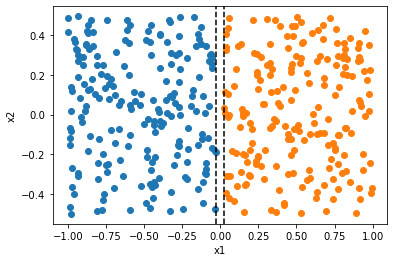

In [3]:
gamma = 0.05
a1 = np.random.uniform(-1.0, -gamma/2.0, size=200)
a2 = np.random.uniform(-0.5, 0.5, size=200)
x1 = np.random.uniform(gamma/2.0, 1.0, size=200)
x2 = np.random.uniform(-0.5, 0.5, size=200)

# create data
c1 = np.squeeze(np.dstack((a1, a2)))
c2 = np.squeeze(np.dstack((x1, x2)))

# create labels
y1 = np.negative(np.ones(200))
y2 = np.ones(200)

# concatenate data from class1 and class2
data = np.concatenate((c1, c2))
# concatenate labels for class1 and class2
labels = np.concatenate((y1, y2))

# shuffle in the same way to make sure each labels corresponds to the correct data
randomize = np.arange(len(data))
np.random.shuffle(randomize)
data = data[randomize]
labels = labels[randomize]
x = tf.cast(data, tf.float32)
y = tf.cast(labels, tf.float32)

show_data(c1, c2, gamma)

## Perceptron algorithm 
* Class label $y_i \in \{-1, 1\}$ 
* Threshold function $h(x)=-1$ if $x < 0$; $h(x)=1$ if $x \geq 0 $
* The prediction: $\hat{y_i} = h(\phi (x_i)^\top w)$
* Correct classification: $y_i \phi (x_i)^\top w > 0$
* False classification: $y_i \phi (x_i)^\top w < 0$
* Goal: find parameters $w \in \mathbb{R}^n$ such that all inputs $y_i \phi (x_i)^\top w > 0$
* Loss function is defined as $$\mathcal{L}(w)= \sum_{i=1}^m \max (-y_i \phi (x_i)^\top w, 0)$$

### Psuedo code

* Initialisation: iteration $t=0$, learning rate $\eta>0$, parameters $w^{(0)}$ arbitrarily 
* Repeat until $\forall (x_i, y_i): y_i \phi (x_i)^\top w > 0$ 

$\qquad \quad \hat{y}_i^t = h(\phi (x_i^t)^\top w^{(t)})$ 

$\qquad \quad \mathbf{if} \, \hat{y}_i^t \neq y_i^t \, \mathbf{then}$ 

$\qquad \qquad \quad w^{(t+1)} = w^{(t)} + \eta y_i^t \phi (x_i^t)$ 

$\qquad \quad \mathbf{else}$ 
$\qquad \qquad \quad w^{(t+1)} = w^{(t)}$ 

## Build the model

In [4]:
W = tf.Variable(tf.ones(shape=(2,)), name="W")
# tf.sign() returns an element-wise indication of the sign of a number.
# y = sign(x) = -1 if x < 0; 0 if x == 0; 1 if x > 0.
# adding a small number to obtain +1 when x is 0
def threshold_function(x):
    return tf.sign(tf.sign(x) + 1e-08)

# y_hat = h(x^T w)
@tf.function
def per_model(x):
    return threshold_function(tf.reduce_sum(W * x))

## Train the model

In [5]:
loss_list = []
count = 1
mistake_list = []

while True:
    print('Number of full pass(es):', count)
    count += 1
    stopping_criteria = np.zeros(400)
    
    for i in range(len(x)):
        y_hat = per_model(x[i])
        loss = tf.math.maximum(-y[i] * y_hat, 0)
        loss_list.append(loss)
        stopping_criteria[i] = y[i] * y_hat
    
        # update weights += eta * y * x
        if y[i] != y_hat:
            W.assign_sub(-0.01 * y[i] * x[i]) 
    
    # record misclassification    
    mistakes = [item < 0.0 for item in stopping_criteria]
    n_mistakes = sum(mistakes)
    mistake_list.append(n_mistakes)

    if n_mistakes == 0:
        print("Training completed!")
        break

Number of full pass(es): 1
Number of full pass(es): 2
Number of full pass(es): 3
Number of full pass(es): 4
Number of full pass(es): 5
Number of full pass(es): 6
Number of full pass(es): 7
Number of full pass(es): 8
Number of full pass(es): 9
Number of full pass(es): 10
Number of full pass(es): 11
Number of full pass(es): 12
Number of full pass(es): 13
Number of full pass(es): 14
Number of full pass(es): 15
Number of full pass(es): 16
Number of full pass(es): 17
Number of full pass(es): 18
Number of full pass(es): 19
Number of full pass(es): 20
Number of full pass(es): 21
Number of full pass(es): 22
Number of full pass(es): 23
Number of full pass(es): 24
Number of full pass(es): 25
Number of full pass(es): 26
Number of full pass(es): 27
Number of full pass(es): 28
Number of full pass(es): 29
Training completed!


## Execute the graph

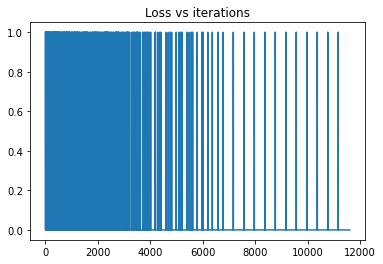

In [6]:
plt.plot(loss_list)
plt.title('Loss vs iterations')
plt.show()

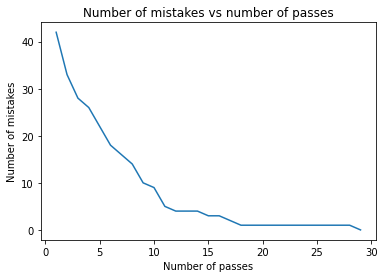

In [10]:
n_passes = np.arange(1, count, dtype=np.int32)
plt.plot(n_passes, mistake_list)
plt.title('Number of mistakes vs number of passes')
plt.xlabel('Number of passes')
plt.ylabel('Number of mistakes')
plt.show()

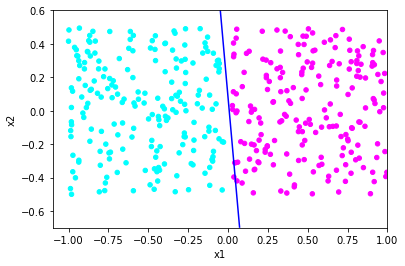

In [11]:
plot_decision_boundary(data, labels, W.numpy())

# Different values of $\gamma$
* we plot the number of mistakes after the algorithm converged versus $\gamma$. 